# Intel Image Classification

This notebook is a simple example of how to use the Intel Image Classification dataset to train a model using PyTorch. The dataset consists of 25,000 images of size 150x150 distributed in 6 classes: buildings, forest, glacier, mountain, sea, and street. The goal is to train a model that can classify these images into one of these classes.

The dataset is available in the [Intel Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification) dataset on Kaggle.

Let's start by loading the data.

## Loading the data

Let's start by import the necessary libraries and loading the data.

In [1]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we can load the data

In [2]:
# Loading the dataset
train_path = '../archive/seg_train/seg_train/'
test_path = '../archive/seg_test/seg_test/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)

# Checking the shape of the dataset
print()
print("Shape of the training set: ", X_train.shape)
print("Shape of the testing set: ", X_test.shape)
print("Number of images in the training set: ", X_train.shape[0])
print("Number of images in the testing set: ", X_test.shape[0])

100%|██████████| 510/510 [00:00<00:00, 2258.98it/s]


Shape of the training set:  (14034, 150, 150, 3)
Shape of the testing set:  (3000, 150, 150, 3)
Number of images in the training set:  14034
Number of images in the testing set:  3000


Now let's check the unique classes in the dataset.

In [3]:
# Checking the unique classes
classes_names = np.unique(y_train)

print(classes_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


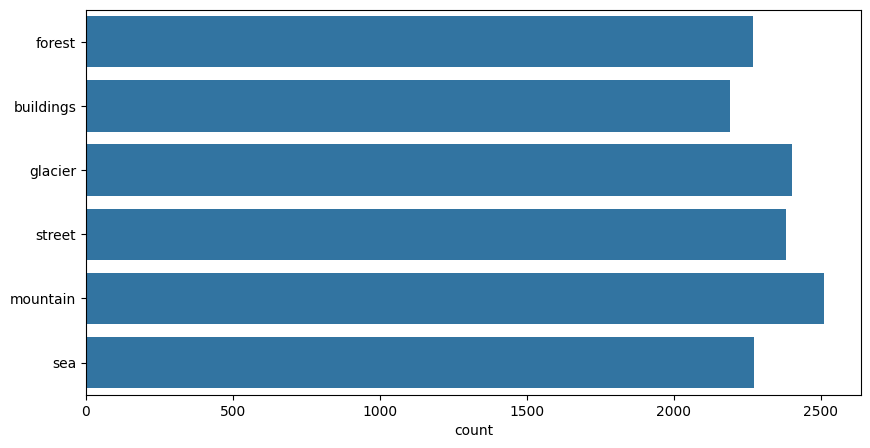

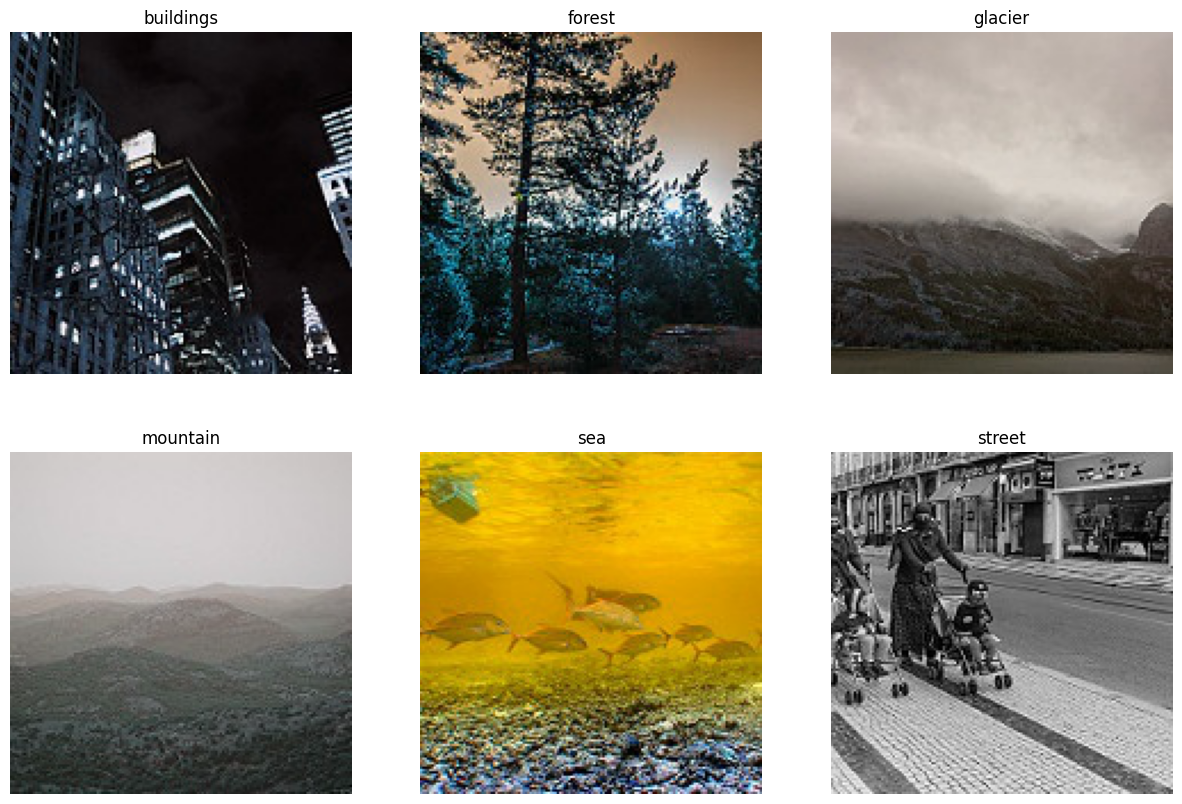

In [4]:
# Checking the distribution of the classes
plt.figure(figsize=(10, 5))
sns.countplot(y_train)
plt.show()

# Plotting the images for each class
plt.figure(figsize=(15, 10))
printed = []

for class_name in classes_names:
    for i in range(len(y_train)):
        if y_train[i] == class_name and class_name not in printed:
            plt.subplot(2, 3, len(printed) + 1)
            plt.imshow(X_train[i])
            plt.title(class_name)
            plt.axis('off')
            printed.append(class_name)
            break
    
plt.show()


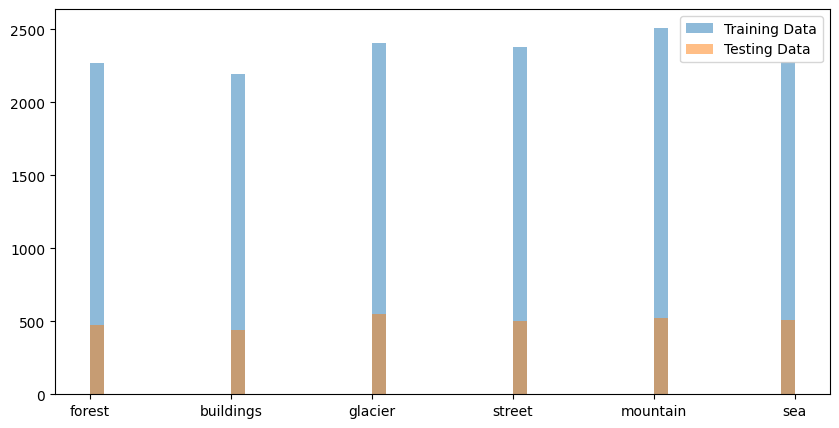

In [5]:
# Histogram to show the distribution training data and testing data

plt.figure(figsize=(10, 5))
plt.hist(y_train, alpha=0.5, bins=50, label='Training Data')
plt.hist(y_test, alpha=0.5, bins=50,  label='Testing Data')
plt.legend()
plt.show()

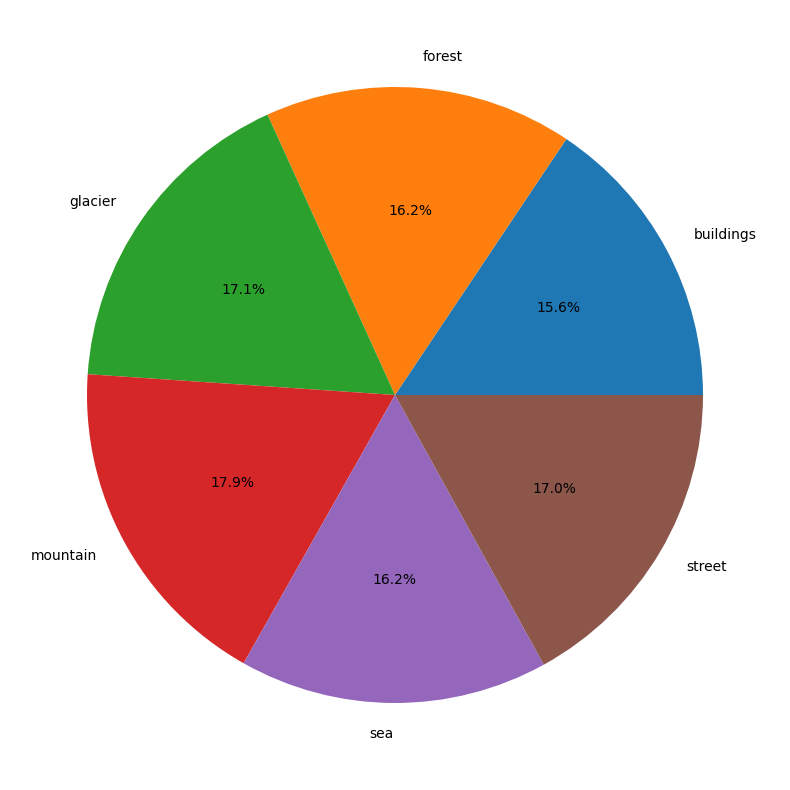

In [6]:
# Pie chart to show the distribution of the classes
plt.figure(figsize=(10, 10))
plt.pie([len(y_train[y_train == class_name]) for class_name in classes_names], labels=classes_names, autopct='%1.1f%%')
plt.show()

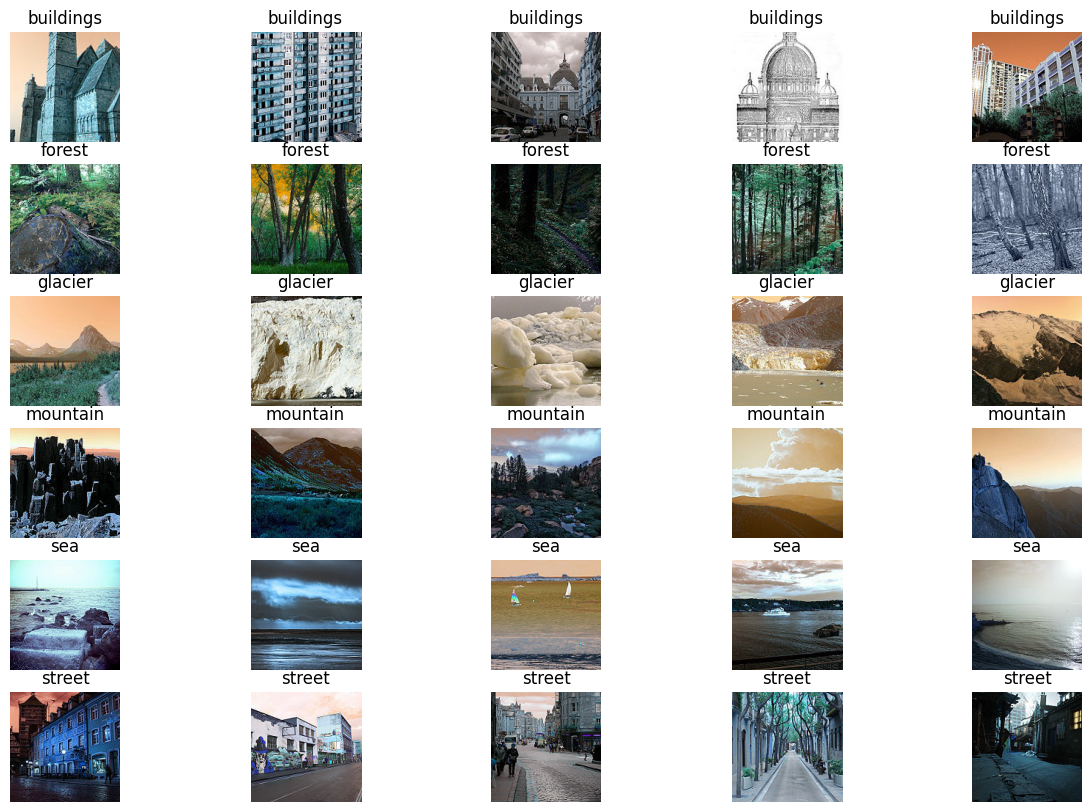

In [7]:
# Function to display random images from the dataset

def display_random_images(X, y, classes_names, number_of_images=5):
    plt.figure(figsize=(15, 10))

    for class_name in classes_names:
        for i in range(number_of_images):
            plt.subplot(len(classes_names), number_of_images, number_of_images * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[y == class_name][np.random.randint(0, len(X[y == class_name]))])
            plt.title(class_name)
            plt.axis('off')
    
    plt.show()

display_random_images(X_train, y_train, classes_names)

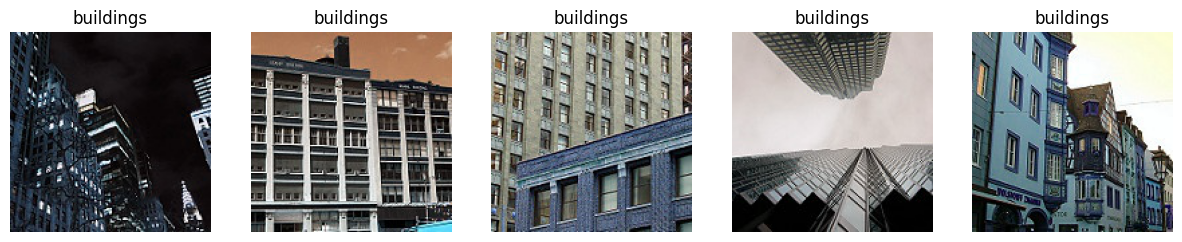

In [8]:
# Function to display the images of a particular class

def display_images_of_class(X, y, class_name, number_of_images=5):
    plt.figure(figsize=(15, 10))

    for i in range(number_of_images):
        plt.subplot(1, number_of_images, i + 1)
        plt.imshow(X[y == class_name][i])
        plt.title(class_name)
        plt.axis('off')
    
    plt.show()

display_images_of_class(X_train, y_train, 'buildings')